In [2]:
"""
Notebook: 02_test_data_generation.ipynb
Objectif: Tester les fonctions de génération d'états valides
Auteur: [Ton nom]
Date: 2024-11-12
"""

import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Ajoute le dossier src/ au path Python pour pouvoir importer nos modules
# Remonte d'un niveau depuis notebooks/ pour atteindre la racine du projet
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

# Import de notre module
from data_generation import (
    generate_valid_states,
    verify_normalization,
    print_strategy_info
)

print("Module data_generation importé avec succès!")
print(f"Chemin du projet: {project_root}")

# Affiche les stratégies disponibles
print_strategy_info()

Module data_generation importé avec succès!
Chemin du projet: c:\Users\micka\Desktop\Mkl\INFO\AI\Quantum_AI\quantum_state_validator
STRATÉGIES DE GÉNÉRATION D'ÉTATS VALIDES

📌 RANDOM
   Génération gaussienne + normalisation. Explore uniformément l'espace des états quantiques. Recommandé pour usage général.

📌 DIRICHLET
   Distribution de Dirichlet pour les probabilités. Paramètre alpha contrôle la dispersion: alpha=1 (uniforme), alpha>1 (équilibré), alpha<1 (pics). Utile pour tester différentes distributions de probabilités.

📌 BASIS
   États purs de la base canonique. Génère des états du type |0⟩, |1⟩, ..., |n-1⟩. Utile pour avoir des cas triviaux dans le dataset.



In [3]:
print("=" * 70)
print("TEST 1 : STRATÉGIE RANDOM")
print("=" * 70)

# Génère 1000 états de dimension 4
n_samples = 1000
dim = 4

states_random = generate_valid_states(
    n_samples=n_samples,
    dim=dim,
    strategy="random",
    seed=42  # Reproductibilité
)

print(f"\n✅ {n_samples} états générés")
print(f"📊 Shape: {states_random.shape}")
print(f"🔢 Dtype: {states_random.dtype}")

# Vérification
all_valid, norms = verify_normalization(states_random)

print(f"\n🔍 Vérification de normalisation:")
print(f"   Tous valides? {all_valid}")
print(f"   Min(||ψ||²) = {norms.min():.10f}")
print(f"   Max(||ψ||²) = {norms.max():.10f}")
print(f"   Moyenne(||ψ||²) = {norms.mean():.10f}")
print(f"   Écart-type = {norms.std():.2e}")

# Affiche quelques états
print(f"\n📋 Exemples d'états générés:")
for i in range(3):
    print(f"\nÉtat {i}:")
    print(f"  {states_random[i]}")
    print(f"  ||ψ||² = {norms[i]:.10f}")
    
    # Décompose en probabilités
    probs = np.abs(states_random[i])**2
    print(f"  Probabilités: {probs}")
    print(f"  Somme = {probs.sum():.10f}")

TEST 1 : STRATÉGIE RANDOM

✅ 1000 états générés
📊 Shape: (1000, 4)
🔢 Dtype: complex128

🔍 Vérification de normalisation:
   Tous valides? True
   Min(||ψ||²) = 1.0000000000
   Max(||ψ||²) = 1.0000000000
   Moyenne(||ψ||²) = 1.0000000000
   Écart-type = 1.98e-16

📋 Exemples d'états générés:

État 0:
  [ 0.10405988+0.08646851j -0.35515114+0.30571413j  0.25627661+0.09333831j
  0.32119975+0.76455363j]
  ||ψ||² = 1.0000000000
  Probabilités: [0.01830526 0.21959347 0.07438974 0.68771153]
  Somme = 1.0000000000

État 1:
  [-0.68640643+0.50302286j -0.45812828-0.10819335j  0.04497637-0.11188731j
 -0.11125937+0.16524707j]
  ||ψ||² = 1.0000000000
  Probabilités: [0.72418579 0.22158732 0.01454164 0.03968524]
  Somme = 1.0000000000

État 2:
  [-0.00804141-0.40109478j -0.40828596+0.55821175j  0.4208996 +0.17307012j
  0.37226867+0.12274699j]
  ||ψ||² = 1.0000000000
  Probabilités: [0.16094169 0.47829778 0.20710974 0.15365079]
  Somme = 1.0000000000


VISUALISATION : DISTRIBUTION DES PROBABILITÉS


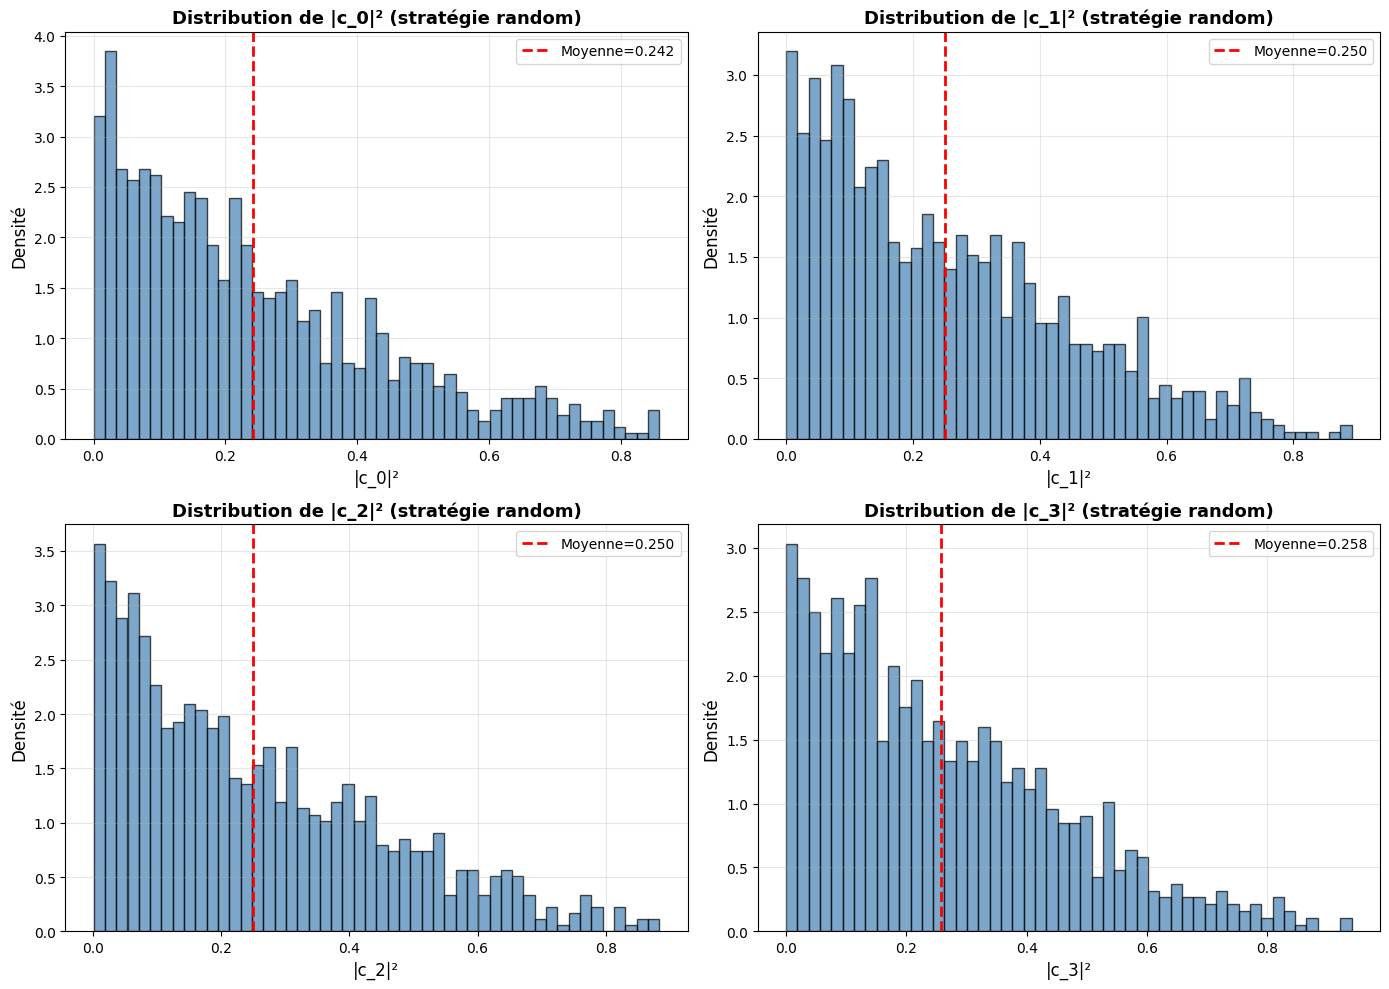


💡 Interprétation:
   Pour stratégie 'random', les probabilités sont distribuées
   de manière relativement uniforme entre 0 et 1.
   Moyenne attendue ≈ 1/4 = 0.250


In [4]:
print("=" * 70)
print("VISUALISATION : DISTRIBUTION DES PROBABILITÉS")
print("=" * 70)

# Pour chaque état, on extrait les 4 probabilités |c_i|²
probabilities_matrix = np.abs(states_random)**2  # Shape: (1000, 4)

# Crée 4 histogrammes (un par composante)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i in range(dim):
    ax = axes[i]
    
    # Histogramme des probabilités pour la composante i
    ax.hist(
        probabilities_matrix[:, i],
        bins=50,
        color='steelblue',
        edgecolor='black',
        alpha=0.7,
        density=True  # Normalise pour avoir une densité de probabilité
    )
    
    ax.set_xlabel(f'|c_{i}|²', fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title(f'Distribution de |c_{i}|² (stratégie random)', fontsize=13, fontweight='bold')
    ax.grid(alpha=0.3)
    
    # Statistiques
    mean = probabilities_matrix[:, i].mean()
    std = probabilities_matrix[:, i].std()
    ax.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Moyenne={mean:.3f}')
    ax.legend()

plt.tight_layout()
plt.show()

print(f"\n💡 Interprétation:")
print(f"   Pour stratégie 'random', les probabilités sont distribuées")
print(f"   de manière relativement uniforme entre 0 et 1.")
print(f"   Moyenne attendue ≈ 1/{dim} = {1/dim:.3f}")

TEST 2 : STRATÉGIE DIRICHLET

--- α = 0.1 ---
Tous normalisés? True

--- α = 1.0 ---
Tous normalisés? True

--- α = 5.0 ---
Tous normalisés? True


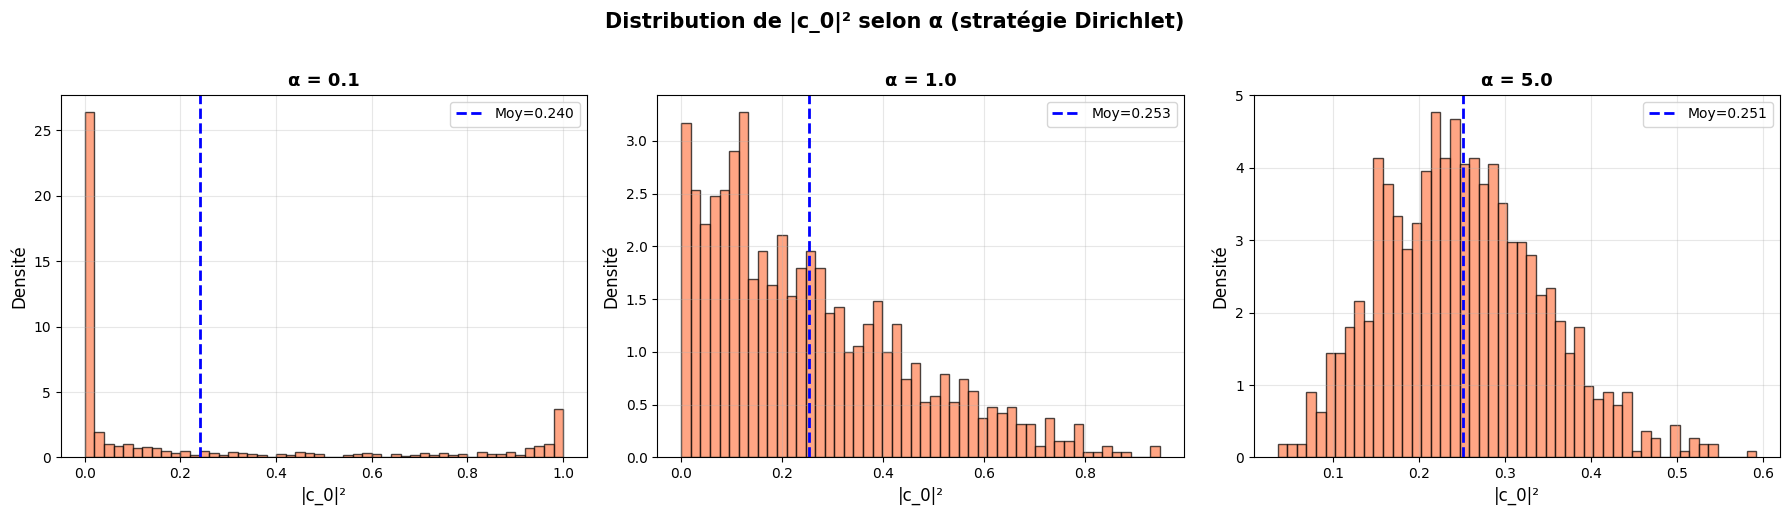


💡 Observations:
   α < 1 : Distribution concentrée aux extrêmes (0 ou 1)
           → États 'localisés' (une composante domine)
   α = 1 : Distribution uniforme
           → Tous types d'états équiprobables
   α > 1 : Distribution concentrée au centre (autour de 0.25)
           → États 'équilibrés' (probabilités similaires)


In [5]:
print("=" * 70)
print("TEST 2 : STRATÉGIE DIRICHLET")
print("=" * 70)

# Test avec différents α
alphas = [0.1, 1.0, 5.0]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, alpha in enumerate(alphas):
    print(f"\n--- α = {alpha} ---")
    
    states_dirichlet = generate_valid_states(
        n_samples=1000,
        dim=4,
        strategy="dirichlet",
        alpha=alpha,
        seed=42
    )
    
    # Vérifie normalisation
    all_valid, norms = verify_normalization(states_dirichlet)
    print(f"Tous normalisés? {all_valid}")
    
    # Extrait les probabilités
    probs = np.abs(states_dirichlet)**2
    
    # Visualise la distribution de la PREMIÈRE composante
    ax = axes[idx]
    ax.hist(
        probs[:, 0],
        bins=50,
        color='coral',
        edgecolor='black',
        alpha=0.7,
        density=True
    )
    
    ax.set_xlabel('|c_0|²', fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title(f'α = {alpha}', fontsize=13, fontweight='bold')
    ax.grid(alpha=0.3)
    
    mean = probs[:, 0].mean()
    ax.axvline(mean, color='blue', linestyle='--', linewidth=2, label=f'Moy={mean:.3f}')
    ax.legend()

plt.suptitle('Distribution de |c_0|² selon α (stratégie Dirichlet)', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("   α < 1 : Distribution concentrée aux extrêmes (0 ou 1)")
print("           → États 'localisés' (une composante domine)")
print("   α = 1 : Distribution uniforme")
print("           → Tous types d'états équiprobables")
print("   α > 1 : Distribution concentrée au centre (autour de 0.25)")
print("           → États 'équilibrés' (probabilités similaires)")

In [6]:
print("=" * 70)
print("TEST 3 : STRATÉGIE BASIS")
print("=" * 70)

states_basis = generate_valid_states(
    n_samples=12,  # On en génère peu pour l'exemple
    dim=4,
    strategy="basis",
    seed=42
)

print(f"✅ {len(states_basis)} états générés\n")

# Affiche tous les états
for i, state in enumerate(states_basis):
    probs = np.abs(state)**2
    
    # Trouve quel état de base c'est
    basis_index = np.argmax(probs)
    
    print(f"État {i:2d}: {state}")
    print(f"         → |{basis_index}⟩ avec P = {probs.max():.1f}")
    print()

# Vérifie normalisation
all_valid, norms = verify_normalization(states_basis)
print(f"Tous normalisés? {all_valid}")

print("\n💡 Ces états sont les vecteurs de la base canonique:")
print("   |0⟩ = (1, 0, 0, 0)")
print("   |1⟩ = (0, 1, 0, 0)")
print("   |2⟩ = (0, 0, 1, 0)")
print("   |3⟩ = (0, 0, 0, 1)")

TEST 3 : STRATÉGIE BASIS
✅ 12 états générés

État  0: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
         → |0⟩ avec P = 1.0

État  1: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
         → |3⟩ avec P = 1.0

État  2: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
         → |2⟩ avec P = 1.0

État  3: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
         → |1⟩ avec P = 1.0

État  4: [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
         → |1⟩ avec P = 1.0

État  5: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
         → |3⟩ avec P = 1.0

État  6: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
         → |0⟩ avec P = 1.0

État  7: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
         → |2⟩ avec P = 1.0

État  8: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
         → |0⟩ avec P = 1.0

État  9: [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
         → |0⟩ avec P = 1.0

État 10: [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
         → |2⟩ avec P = 1.0

État 11: [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
         → |3⟩ avec P = 1.0

Tous normalisés? True

💡 Ces états sont les vecteurs de la base canonique:
   |0⟩ = (1, 0, 0, 0)
   |1⟩ = (0, 1, 0, 0)
   |2⟩ = (0, 0, 1, 0

VISUALISATION 3D : COMPARAISON DES STRATÉGIES


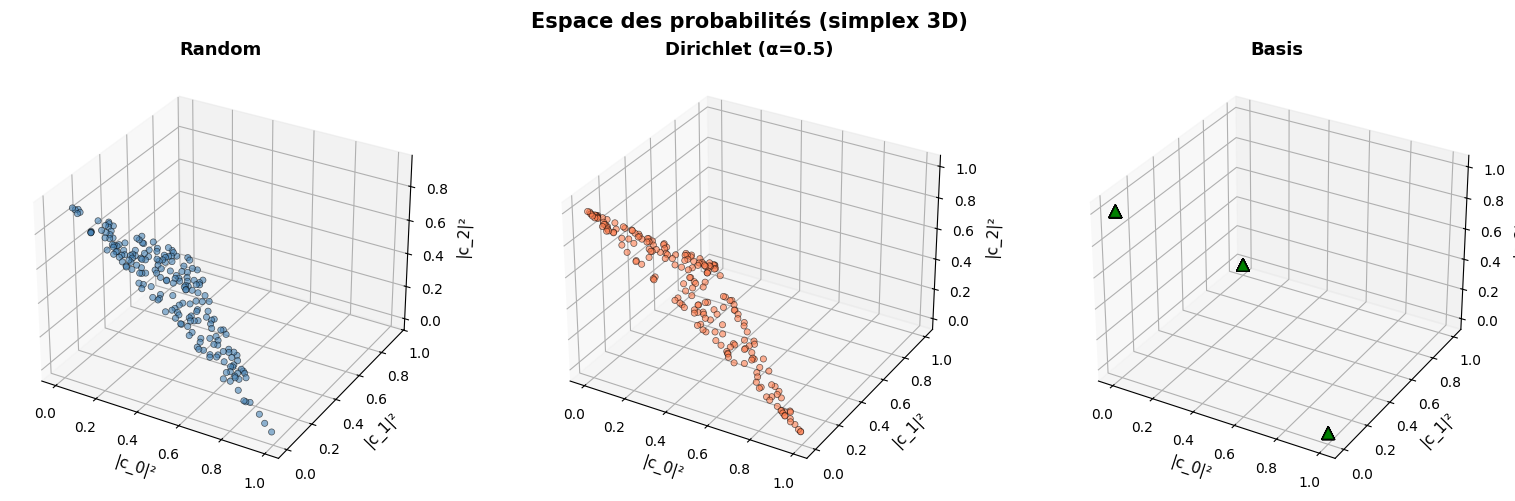


💡 Observations:
   - Les points sont sur un PLAN (le simplex 2D dans R³)
     Car: |c_0|² + |c_1|² + |c_2|² = 1
   - Random: explore tout le simplex uniformément
   - Dirichlet (α<1): concentré près des coins (états localisés)
   - Basis: exactement aux 3 coins (états purs)


In [7]:
print("=" * 70)
print("VISUALISATION 3D : COMPARAISON DES STRATÉGIES")
print("=" * 70)

# Pour visualiser en 3D, on se limite à dim=3
dim_3d = 3
n_viz = 200

# Génère avec les 3 stratégies
states_rand = generate_valid_states(n_viz, dim_3d, strategy="random", seed=1)
states_dir = generate_valid_states(n_viz, dim_3d, strategy="dirichlet", alpha=0.5, seed=2)
states_bas = generate_valid_states(60, dim_3d, strategy="basis", seed=3)  # Moins pour basis

# Extrait les probabilités (pour visualiser)
probs_rand = np.abs(states_rand)**2
probs_dir = np.abs(states_dir)**2
probs_bas = np.abs(states_bas)**2

# Plot 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 5))

# Subplot 1 : Random
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(probs_rand[:, 0], probs_rand[:, 1], probs_rand[:, 2], 
            c='steelblue', marker='o', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
ax1.set_xlabel('|c_0|²', fontsize=11)
ax1.set_ylabel('|c_1|²', fontsize=11)
ax1.set_zlabel('|c_2|²', fontsize=11)
ax1.set_title('Random', fontsize=13, fontweight='bold')

# Subplot 2 : Dirichlet
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(probs_dir[:, 0], probs_dir[:, 1], probs_dir[:, 2],
            c='coral', marker='o', s=20, alpha=0.6, edgecolors='black', linewidth=0.5)
ax2.set_xlabel('|c_0|²', fontsize=11)
ax2.set_ylabel('|c_1|²', fontsize=11)
ax2.set_zlabel('|c_2|²', fontsize=11)
ax2.set_title('Dirichlet (α=0.5)', fontsize=13, fontweight='bold')

# Subplot 3 : Basis
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(probs_bas[:, 0], probs_bas[:, 1], probs_bas[:, 2],
            c='green', marker='^', s=80, alpha=0.8, edgecolors='black', linewidth=1)
ax3.set_xlabel('|c_0|²', fontsize=11)
ax3.set_ylabel('|c_1|²', fontsize=11)
ax3.set_zlabel('|c_2|²', fontsize=11)
ax3.set_title('Basis', fontsize=13, fontweight='bold')

plt.suptitle('Espace des probabilités (simplex 3D)', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print("   - Les points sont sur un PLAN (le simplex 2D dans R³)")
print("     Car: |c_0|² + |c_1|² + |c_2|² = 1")
print("   - Random: explore tout le simplex uniformément")
print("   - Dirichlet (α<1): concentré près des coins (états localisés)")
print("   - Basis: exactement aux 3 coins (états purs)")